# Zeisel imbalanced target genes

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import ipyvolume.pylab as p3

from sklearn import preprocessing

In [2]:
meta_df = pd.read_csv('zeisel_meta_df.tsv', sep='\t')

In [3]:
meta_df.head()

,Unnamed: 0,n_estimators,target
0,0,245,Tspan12
1,0,300,Tshz1
2,0,312,Fnbp1l
3,0,52,Adamts15
4,0,177,Cldn12


In [4]:
nonzero_df = pd.read_csv('zeisel_nonzero.tsv', sep='\t', index_col=0)

In [5]:
nonzero_df.head()

,target,non_zero
0,Malat1,3004
1,Calm1,2998
2,Actb,2997
3,Hsp90ab1,2993
4,Fth1,2990


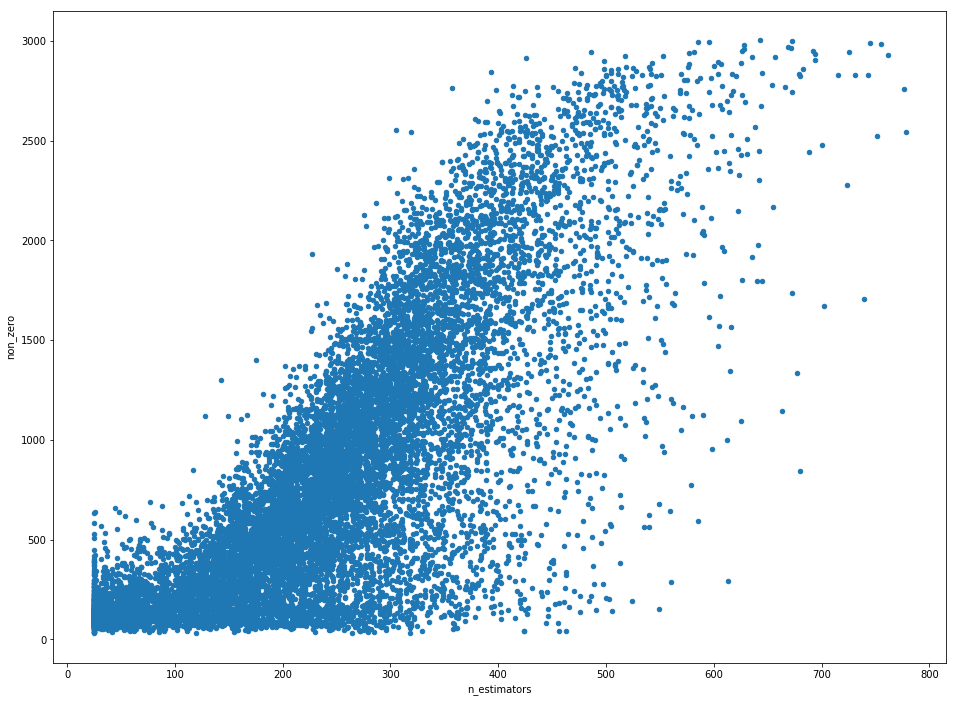

In [6]:
meta_df.merge(nonzero_df, on=['target'], how='inner')[['target', 'n_estimators', 'non_zero']].plot(x='n_estimators', y='non_zero', kind='scatter', figsize=(16,12))
plt.show()

## Interpretation
* `n_estimators` fans out to the right, i.e. overshoots the estimate for 'signal strength'
* could be due to the stochasticity in the feature subsamples of 10%
* Q: in case of overshooting, does this not wrongly skew regressions with a lot of estimators to higher importance values?

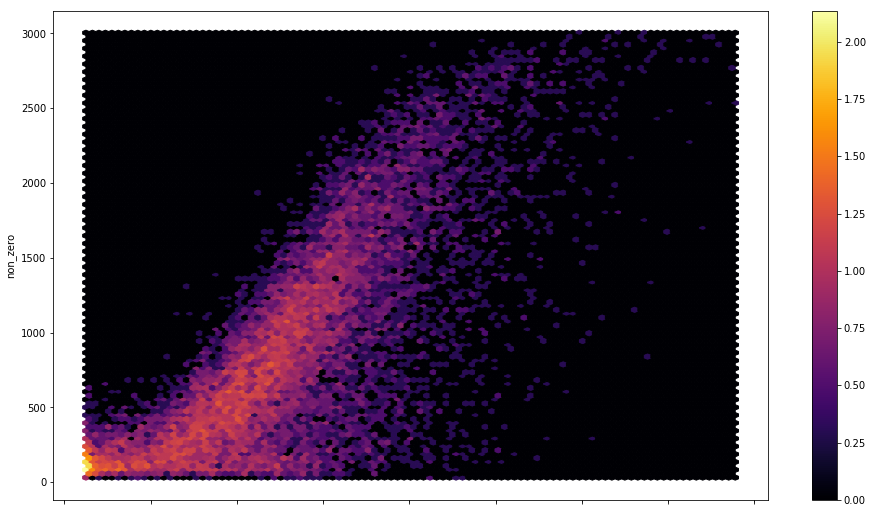

In [7]:
meta_df.merge(nonzero_df, on=['target'], how='inner')[['target', 'n_estimators', 'non_zero']].plot.hexbin(x='n_estimators', 
                                                                                                          y='non_zero', 
                                                                                                          bins='log', 
                                                                                                          cmap='inferno',
                                                                                                          figsize=(16, 9),
                                                                                                         )
plt.show()

---

In [8]:
meta_df.head()

,Unnamed: 0,n_estimators,target
0,0,245,Tspan12
1,0,300,Tshz1
2,0,312,Fnbp1l
3,0,52,Adamts15
4,0,177,Cldn12


In [9]:
zeisel_sgbm_df = pd.read_csv('zeisel_sgbm_100k.txt', sep='\t')

In [10]:
zeisel_sgbm_df.head()

,TF,target,importance
0,Gm14305,OTTMUSG00000016609_loc3,199.404700
1,Gm14305,OTTMUSG00000016609_loc4,193.634840
2,Dab2,Mrc1,104.718613
3,Dab2,Pf4,101.623824
4,Mef2c,Camk2n1,100.149765


In [11]:
merged_df = zeisel_sgbm_df.merge(meta_df)[['TF', 'target', 'importance', 'n_estimators']]
merged_df.head()

,TF,target,importance,n_estimators
0,Gm14305,OTTMUSG00000016609_loc3,199.404700,739
1,Cycs,OTTMUSG00000016609_loc3,22.145701,739
2,Tpi1,OTTMUSG00000016609_loc3,16.117278,739
3,Gm14326,OTTMUSG00000016609_loc3,15.135688,739
4,Suclg1,OTTMUSG00000016609_loc3,14.291515,739


In [12]:
max_importance_by_target_df = merged_df.groupby(['target'])['importance'].nlargest(1).reset_index()

In [13]:
med_importance_by_target_df = merged_df.groupby(['target'])['importance'].median().reset_index()

In [14]:
mean_importance_by_target_df = merged_df.groupby(['target'])['importance'].mean().reset_index()

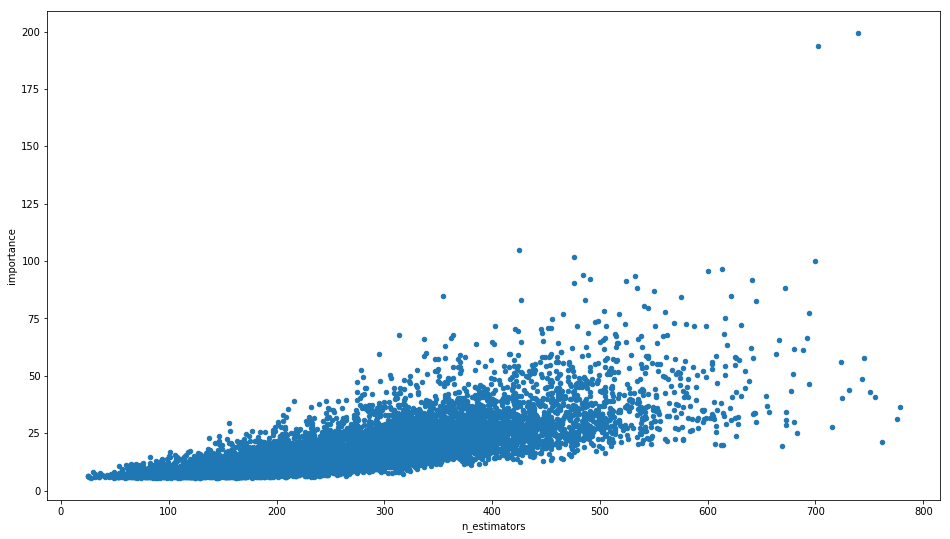

In [15]:
meta_df.merge(max_importance_by_target_df).plot.scatter(x='n_estimators', 
                                                        y='importance',
                                                        figsize=(16,9))
plt.show()

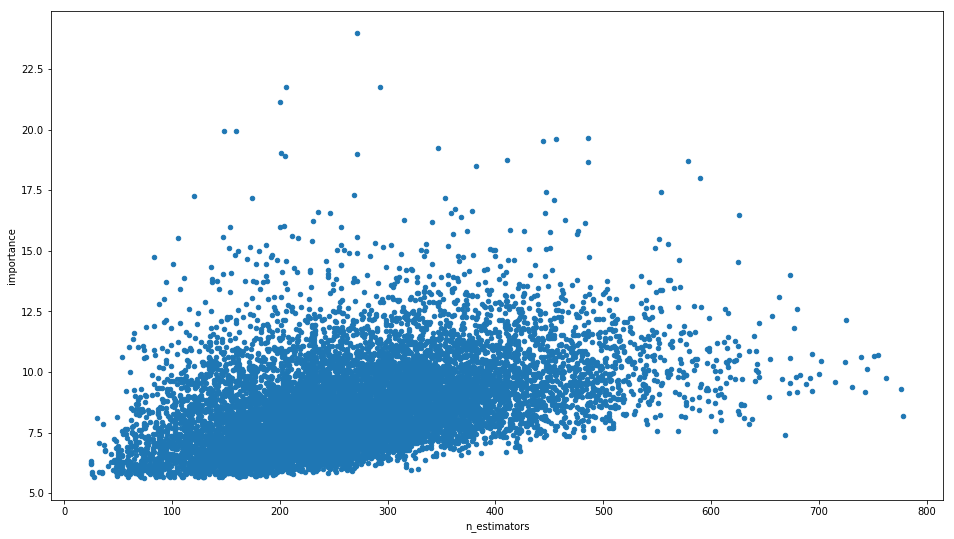

In [16]:
meta_df.merge(med_importance_by_target_df).plot.scatter(x='n_estimators', 
                                                        y='importance',
                                                        figsize=(16,9))
plt.show()

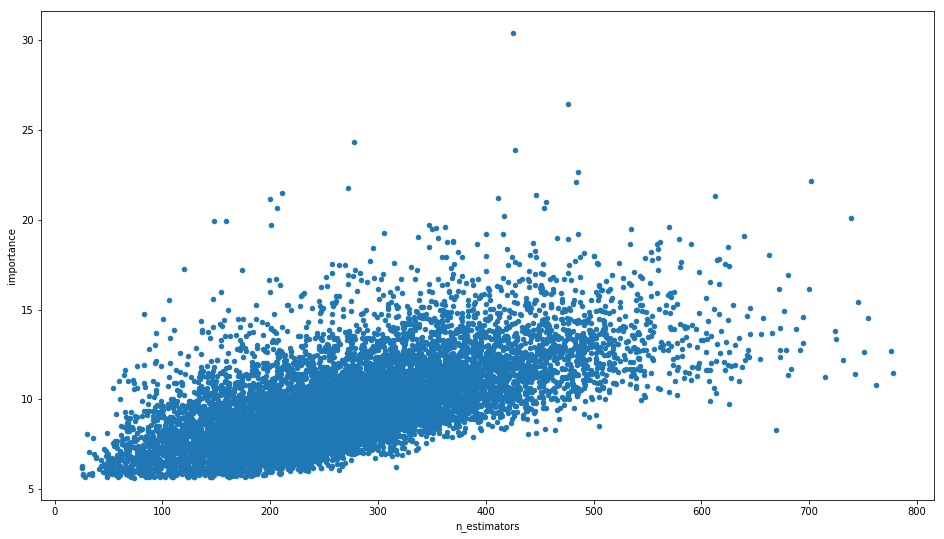

In [17]:
meta_df.merge(mean_importance_by_target_df).plot.scatter(x='n_estimators', 
                                                        y='importance',
                                                        figsize=(16,9))
plt.show()

In [18]:
wo_outliers = max_importance_by_target_df[max_importance_by_target_df['importance'] < 70]

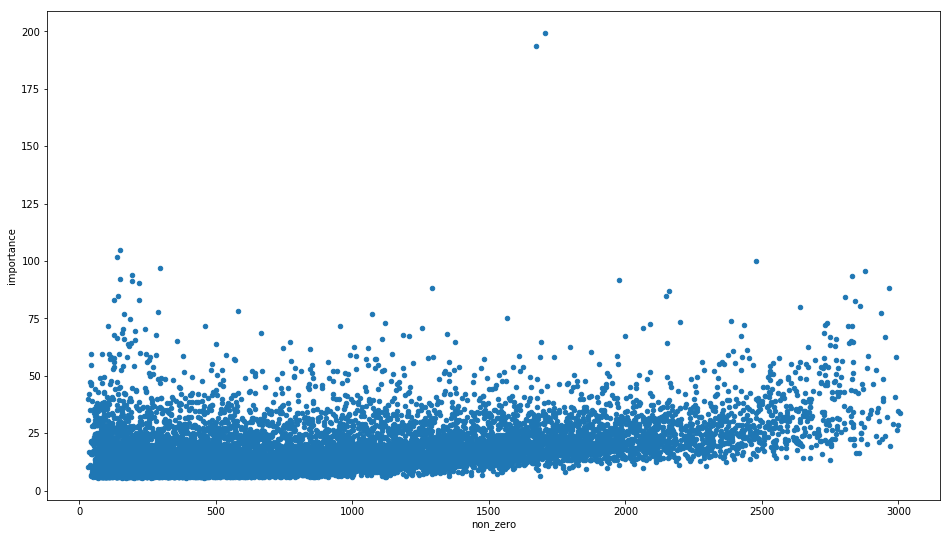

In [19]:
nonzero_df.merge(max_importance_by_target_df).plot.scatter(x='non_zero',
                                                          y='importance',
                                                          figsize=(16,9))
plt.show()

In [20]:
fused_df = nonzero_df.merge(meta_df).merge(max_importance_by_target_df)[['non_zero', 'importance', 'n_estimators']]

In [21]:
fused_mean_df = nonzero_df.merge(meta_df).merge(mean_importance_by_target_df)[['non_zero', 'importance', 'n_estimators']]

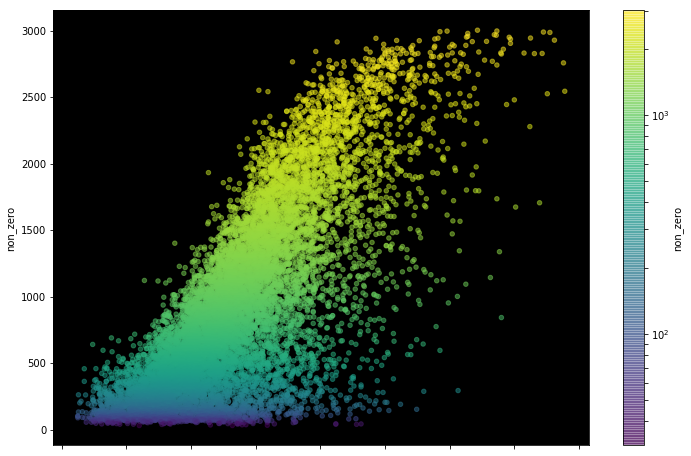

In [22]:
g = fused_df.plot.scatter(x='n_estimators', y='non_zero', c='non_zero', norm=mpl.colors.LogNorm(), alpha=0.5, cmap='viridis', figsize=(12,8))
g.set_facecolor('black')
plt.show()

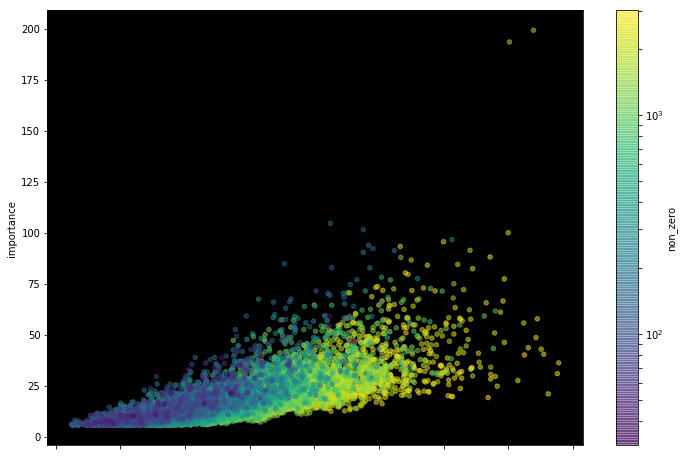

In [23]:
g = fused_df.plot.scatter(x='n_estimators', y='importance', c='non_zero', norm=mpl.colors.LogNorm(), alpha=0.5, cmap='viridis', figsize=(12,8))
g.set_facecolor('black')
# plt.savefig('x.n_st.y.max_imp.c.n_non0.png')
plt.show()

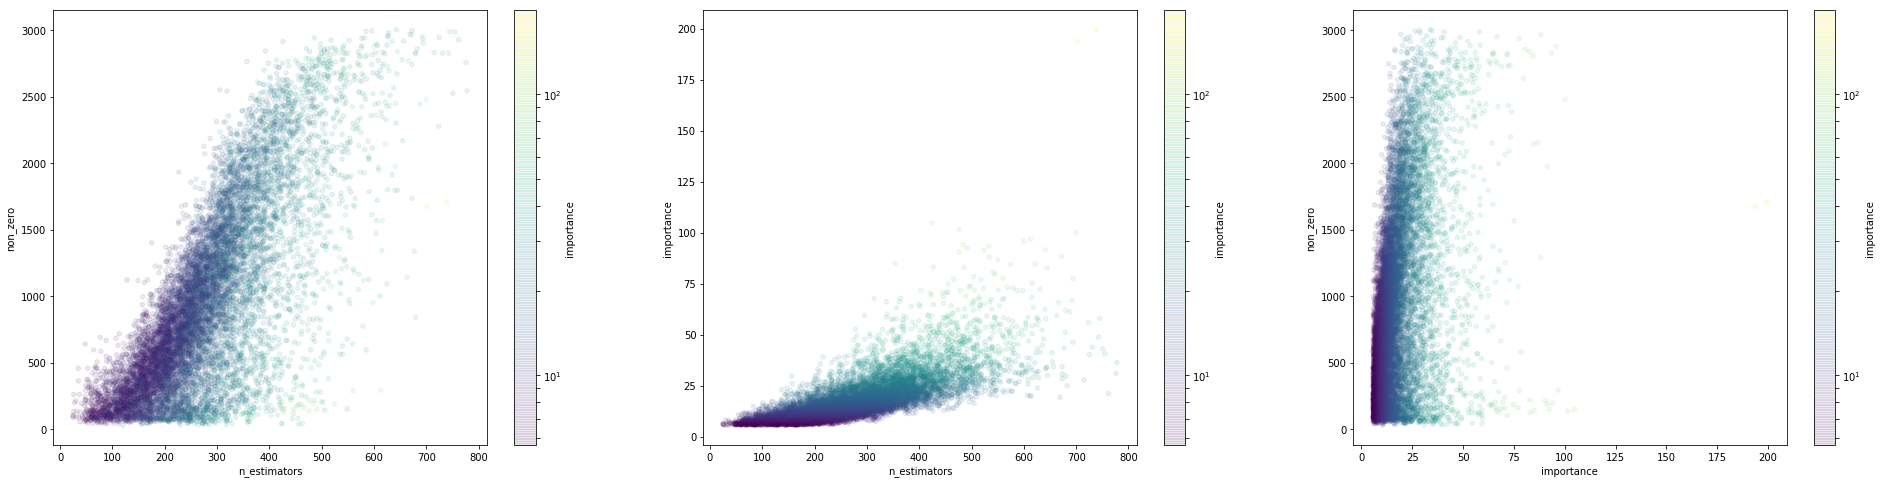

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)

color='importance'

g1 = fused_df.plot.scatter(ax=ax1, x='n_estimators', y='non_zero', c=color, norm=mpl.colors.LogNorm(), alpha=0.1, cmap='viridis', figsize=(12,8))
g2 = fused_df.plot.scatter(ax=ax2, x='n_estimators', y='importance', c=color, norm=mpl.colors.LogNorm(), alpha=0.1, cmap='viridis', figsize=(12,8))
g3 = fused_df.plot.scatter(ax=ax3, y='non_zero', x='importance', c=color, norm=mpl.colors.LogNorm(), alpha=0.1, cmap='viridis', figsize=(12,8))

f.set_figwidth(33)

plt.show()

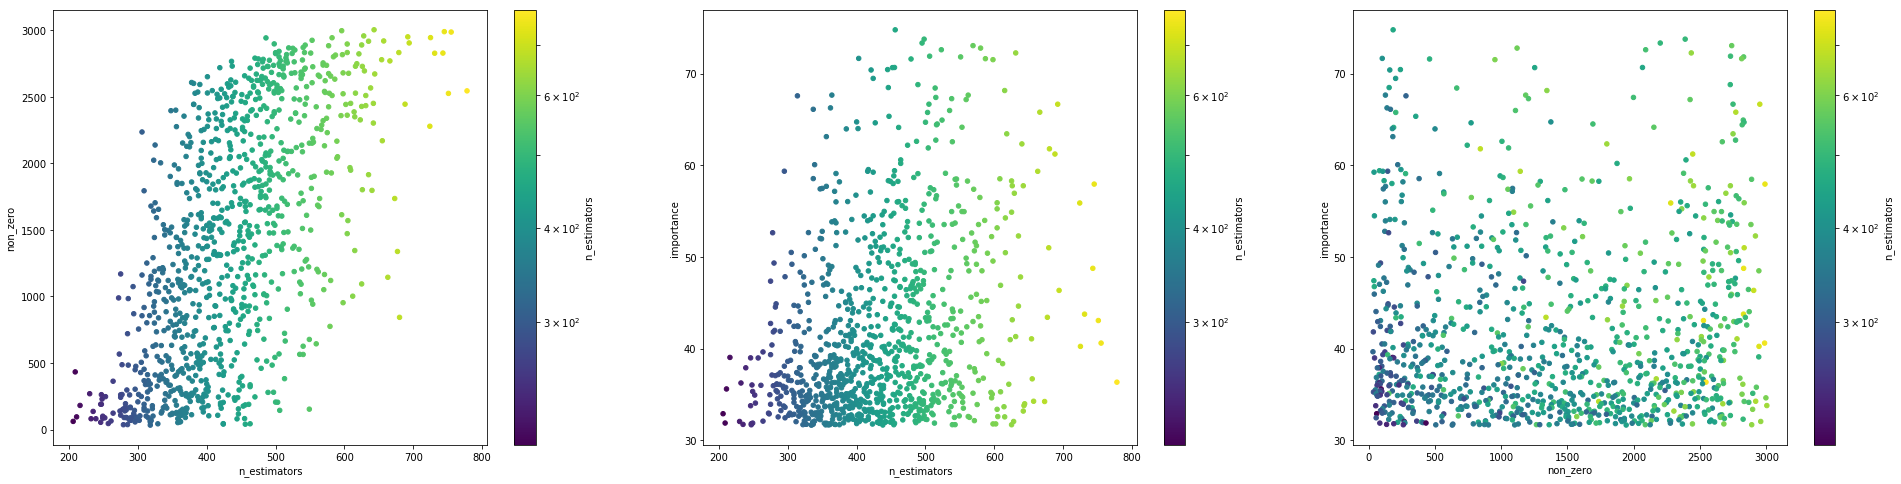

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)

color='n_estimators'

thresh_df = fused_df[fused_df['importance'] < 75].sort_values(by='importance', ascending=False)[:1000]

g1 = thresh_df.plot.scatter(ax=ax1, x='n_estimators', y='non_zero',   c=color, norm=mpl.colors.LogNorm(), alpha=1.0, cmap='viridis', figsize=(12,8))
g2 = thresh_df.plot.scatter(ax=ax2, x='n_estimators', y='importance', c=color, norm=mpl.colors.LogNorm(), alpha=1.0, cmap='viridis', figsize=(12,8))
g3 = thresh_df.plot.scatter(ax=ax3, x='non_zero',     y='importance', c=color, norm=mpl.colors.LogNorm(), alpha=1.0, cmap='viridis', figsize=(12,8))

f.set_figwidth(33)

plt.show()

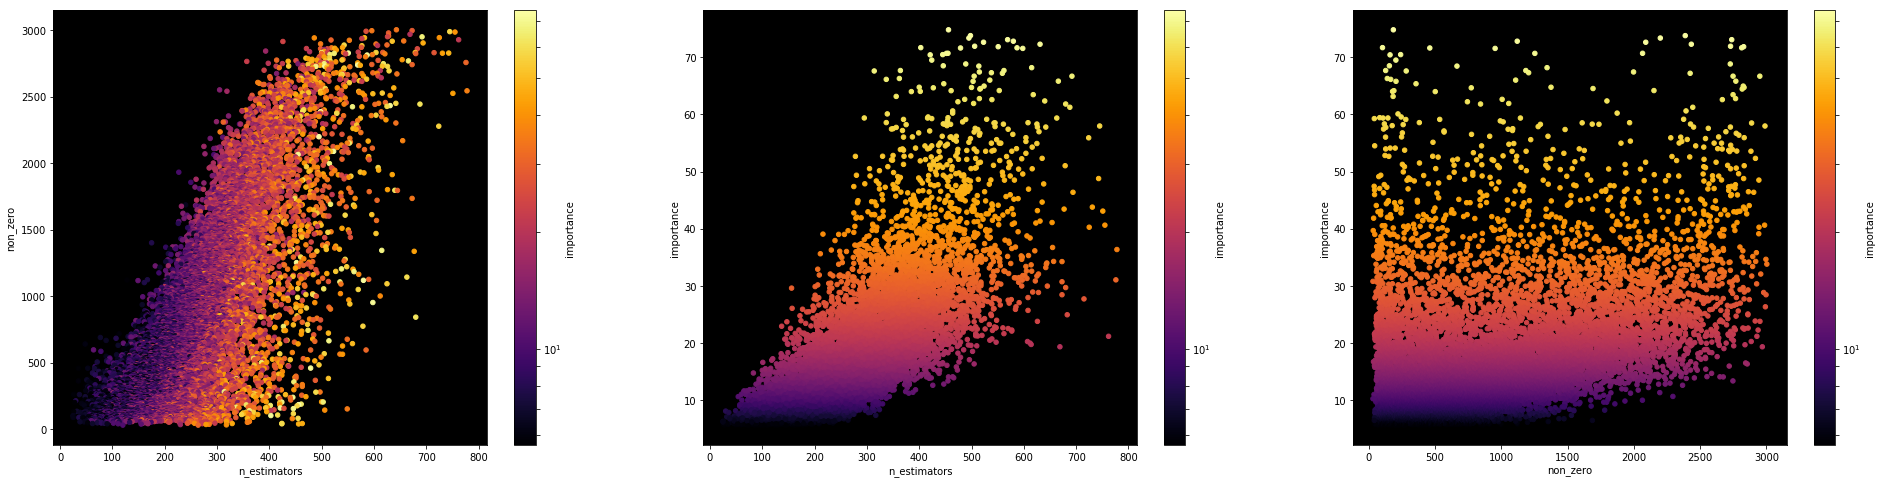

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)

color='importance'

thresh_df = fused_df[fused_df['importance'] < 75]
alpha=1
palette='inferno'

g1 = thresh_df.plot.scatter(ax=ax1, x='n_estimators', y='non_zero',   c=color, norm=mpl.colors.LogNorm(), alpha=alpha, cmap=palette, figsize=(12,8))
g2 = thresh_df.plot.scatter(ax=ax2, x='n_estimators', y='importance', c=color, norm=mpl.colors.LogNorm(), alpha=alpha, cmap=palette, figsize=(12,8))
g3 = thresh_df.plot.scatter(ax=ax3, x='non_zero',     y='importance', c=color, norm=mpl.colors.LogNorm(), alpha=alpha, cmap=palette, figsize=(12,8))

for a in [ax1, ax2, ax3]:
    a.set_facecolor('black')

f.set_figwidth(33)

plt.show()

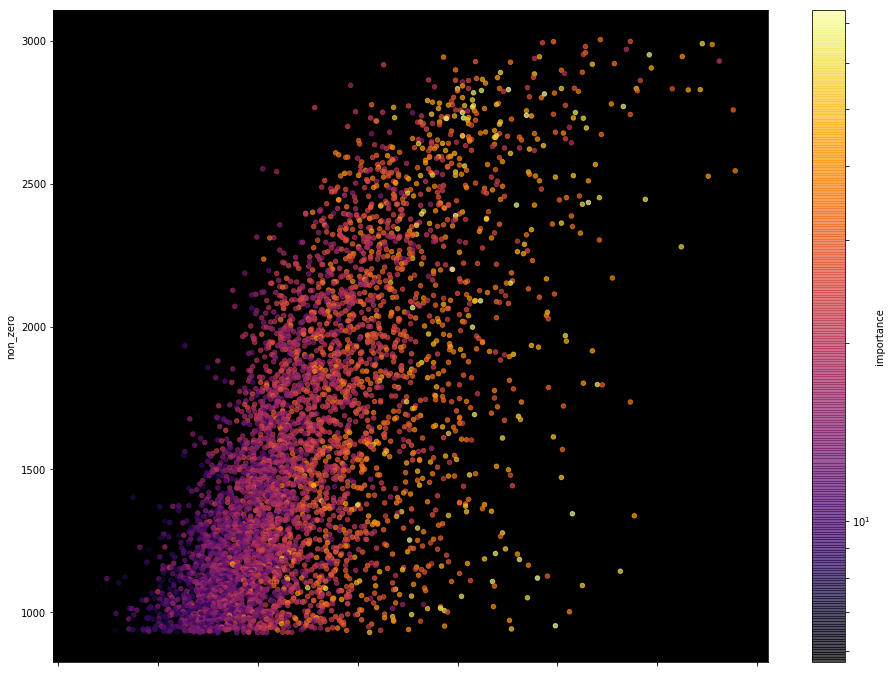

In [39]:
ax = thresh_df[:5000].plot.scatter(x='n_estimators', y='non_zero', c='importance', norm=mpl.colors.LogNorm(), alpha=0.7, cmap='inferno', figsize=(16,12))
ax.set_facecolor('black')
plt.show()

In [22]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

p3.clear()
p3.scatter(x=fused_df['n_estimators'],
           y=fused_df['importance'],
           z=fused_df['non_zero'],
           size=1.5, marker='sphere')
p3.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white',
      dtype='<U5'), geo='sphere', size=array(1.5), size_selected=array(2.6), x=array([643, 673, 596, ..., 318, 120, 264]), y=array([ 33.8060918 ,  28.44723489,  34.64599656, ...,  39.67280056,
        10.26434677,  30.78919852]), z=array([3004, 2998, 2997, ...,   33,   31,   31]))], style={'axes': {'ticklabel': {'color': 'black'}, 'visible': True, 'color': 'black', 'label': {'color': 'black'}}, 'background-color': 'white', 'box': {'visible': True}}, tf=None, width=400, xlim=[0.0, 778.0], ylim=[0.0, 199.40469954488373], zlim=[0.0, 3004.0]),))

---

### Plot correlation between `n_estimators`, `n_non_zero` and a 'signal' measure


a pile of BS ensues...

In [118]:
zeisel_ex_path = '/media/tmo/data/work/datasets/zeisel/expression_sara_filtered.txt'

In [119]:
zeisel_df = pd.read_csv(zeisel_ex_path, index_col=0, sep='\t').T

In [120]:
zeisel_df.head()

,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Rab9,Tceanc,Msl3,Arhgap6,Mid1,Vamp7,Tmlhe,Zf12,Kdm5d,Uty
1772071015_C02,0,3,3,0,1,0,0,11,1,0,...,7,0,0,0,0,5,0,0,0,0
1772071017_G12,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1772071017_A05,0,0,6,0,1,0,2,25,1,0,...,1,0,2,0,0,3,0,0,0,7
1772071014_B06,3,2,4,0,0,0,3,1,0,0,...,3,0,1,0,0,0,0,0,0,0
1772067065_H06,0,2,1,0,0,0,0,10,0,0,...,0,0,4,0,0,3,0,0,0,0


In [121]:
def variance_normalize(df):
    scaler = preprocessing.StandardScaler()
    scaled = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled)
    scaled_df.columns = df.columns
    return scaled_df

In [122]:
zeisel_scaled_df = variance_normalize(zeisel_df)

In [123]:
zeisel_scaled_df.head()

,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Rab9,Tceanc,Msl3,Arhgap6,Mid1,Vamp7,Tmlhe,Zf12,Kdm5d,Uty
0,-0.325159,2.119118,0.981584,-0.134558,0.678872,-0.158767,-0.154022,2.015803,0.690184,-0.142636,...,2.674508,-0.145952,-0.465043,-0.198497,-0.20482,1.593207,-0.163156,-0.185844,-0.306075,-0.322434
1,-0.325159,0.474078,-0.021531,-0.134558,0.678872,-0.158767,-0.154022,-0.215839,-0.259886,-0.142636,...,-0.246938,-0.145952,-0.465043,-0.198497,-0.20482,-0.746081,-0.163156,-0.185844,-0.306075,-0.322434
2,-0.325159,-0.348442,2.486257,-0.134558,0.678872,-0.158767,2.775312,4.856075,0.690184,-0.142636,...,-0.246938,-0.145952,1.860171,-0.198497,-0.20482,0.657492,-0.163156,-0.185844,-0.306075,8.328595
3,3.172819,1.296598,1.483142,-0.134558,-0.414968,-0.158767,4.239979,-0.012962,-0.259886,-0.142636,...,0.726878,-0.145952,0.697564,-0.198497,-0.20482,-0.746081,-0.163156,-0.185844,-0.306075,-0.322434
4,-0.325159,1.296598,-0.021531,-0.134558,-0.414968,-0.158767,-0.154022,1.812926,-0.259886,-0.142636,...,-0.733845,-0.145952,4.185386,-0.198497,-0.20482,0.657492,-0.163156,-0.185844,-0.306075,-0.322434


In [124]:
def sum_pos_log(df):
    res_df = pd.DataFrame(np.sum(np.amin(0.0, np.log(np.abs(df), axis=0)))).reset_index()
    res_df.columns=['target', 'sum_log']
    return res_df

In [125]:
def sum_squares(df):
    """
    This is rather ridiculous...
    """
    ss_df = pd.DataFrame(np.sum(np.power(df, 2))).reset_index()
    ss_df.columns=['target', 'sum_squares']
    return ss_df

In [126]:
ss_df = sum_squares(zeisel_df).sort_values(by='sum_squares', ascending=False)

In [127]:
sum_scaled_df = pd.DataFrame(np.sum(zeisel_scaled_df, axis=0) * 100000000000).reset_index()
sum_scaled_df.columns=['target', 'sum_scaled']

In [128]:
sum_scaled_df.head()

,target,sum_scaled
0,Tspan12,0.507971
1,Tshz1,-0.222883
2,Fnbp1l,2.171952
3,Adamts15,-0.375039
4,Cldn12,2.210909


In [129]:
meta_df.merge(sum_scaled_df).plot.scatter(x='n_estimators', y='sum_scaled')

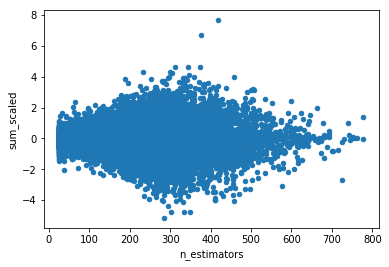

In [130]:
plt.show()